In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
raw_data = pd.read_csv('data.csv')

In [39]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30360 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 9144 non-null   object
 1   Price                 30360 non-null  object
 2   Address               30360 non-null  object
 3   Price per m2          12 non-null     object
 4   Area                  30358 non-null  object
 5   Bedrooms              20632 non-null  object
 6   Toilets               19720 non-null  object
 7   Published At          30360 non-null  object
 8   Diện tích             30358 non-null  object
 9   Mức giá               30360 non-null  object
 10  Hướng nhà             7640 non-null   object
 11  Hướng ban công        4677 non-null   object
 12  Ngày đăng             30360 non-null  object
 13  Ngày hết hạn          30360 non-null  object
 14  Loại tin              30360 non-null  object
 15  Mã tin                30360 non-null

In [42]:
unduplicated_data = raw_data.drop_duplicates(subset=['Mã tin'], keep='first')
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12446 entries, 0 to 30359
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 3838 non-null   object
 1   Price                 12446 non-null  object
 2   Address               12446 non-null  object
 3   Price per m2          1 non-null      object
 4   Area                  12445 non-null  object
 5   Bedrooms              8202 non-null   object
 6   Toilets               7805 non-null   object
 7   Published At          12446 non-null  object
 8   Diện tích             12445 non-null  object
 9   Mức giá               12446 non-null  object
 10  Hướng nhà             3131 non-null   object
 11  Hướng ban công        1828 non-null   object
 12  Ngày đăng             12446 non-null  object
 13  Ngày hết hạn          12446 non-null  object
 14  Loại tin              12446 non-null  object
 15  Mã tin                12446 non-null  obj

In [43]:
unduplicated_data = unduplicated_data.drop(["Price per m2", "Project Address", "Title", "Diện tích", "Mức giá", "Project Title", "Ngày hết hạn", "Number of Buildings", "Ngày đăng", "Mã tin"], axis="columns")
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12446 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 12446 non-null  object
 1   Address               12446 non-null  object
 2   Area                  12445 non-null  object
 3   Bedrooms              8202 non-null   object
 4   Toilets               7805 non-null   object
 5   Published At          12446 non-null  object
 6   Hướng nhà             3131 non-null   object
 7   Hướng ban công        1828 non-null   object
 8   Loại tin              12446 non-null  object
 9   Status                3838 non-null   object
 10  Number of Apartments  3838 non-null   object
 11  Developer             3838 non-null   object
dtypes: object(12)
memory usage: 1.2+ MB


In [44]:
# unduplicated_data_2.head(30)
unduplicated_data = unduplicated_data[unduplicated_data["Price"] != "Thỏa thuận"]
unduplicated_data.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 11508 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Price                 11508 non-null  object
 1   Address               11508 non-null  object
 2   Area                  11507 non-null  object
 3   Bedrooms              7567 non-null   object
 4   Toilets               7208 non-null   object
 5   Published At          11508 non-null  object
 6   Hướng nhà             2957 non-null   object
 7   Hướng ban công        1725 non-null   object
 8   Loại tin              11508 non-null  object
 9   Status                3606 non-null   object
 10  Number of Apartments  3606 non-null   object
 11  Developer             3606 non-null   object
dtypes: object(12)
memory usage: 1.1+ MB


In [45]:
unduplicated_data.head(20)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer
0,"15,2 tỷ","Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40 m²,6 phòng,4 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN
1,"5,6 tỷ","Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90 m²,3 phòng,2 phòng,23/10/2024,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...
2,7 tỷ,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87 m²,2 phòng,2 phòng,23/10/2024,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô
3,"12,35 tỷ","Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60 m²,4 phòng,NaN,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN
5,"1,35 tỷ","Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57 m²,2 phòng,2 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương
6,"7,8 tỷ","Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100 m²,3 phòng,3 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN
7,"5,95 tỷ","Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87 m²,3 phòng,2 phòng,15/10/2024,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group
9,16 tỷ,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156 m²,8 phòng,9 phòng,17/10/2024,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN
10,"8,6 tỷ","Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34 m²,3 phòng,4 phòng,22/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN
11,"8,7 tỷ","Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80 m²,4 phòng,5 phòng,04/10/2024,NaN,NaN,Tin thường,NaN,NaN,NaN


In [46]:
# Chuyển đổi dữ liệu ở cột Area sang float
def convert_area_value(value):
    try: 
        # Chỉ thực hiện thay thế nếu value là chuỗi
        if isinstance(value, str):
            # Lọc bỏ các dấu chấm ở số hàng nghìn
            value = value.replace('m²', '').replace('.', '')

            # Thay dấu phẩy thành dấu chấm
            value = value.replace(',', '.')
            
            return float(value)
        
        # Nếu value đã là số (float hoặc int), trả về trực tiếp
        elif isinstance(value, (int, float)):
            return float(value)

    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None

unduplicated_data['Area'] = unduplicated_data['Area'].apply(convert_area_value)

Lỗi khi xử lý giá trị: Area. Chi tiết lỗi: could not convert string to float: 'Area'


In [47]:
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11508 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 11508 non-null  object 
 1   Address               11508 non-null  object 
 2   Area                  11506 non-null  float64
 3   Bedrooms              7567 non-null   object 
 4   Toilets               7208 non-null   object 
 5   Published At          11508 non-null  object 
 6   Hướng nhà             2957 non-null   object 
 7   Hướng ban công        1725 non-null   object 
 8   Loại tin              11508 non-null  object 
 9   Status                3606 non-null   object 
 10  Number of Apartments  3606 non-null   object 
 11  Developer             3606 non-null   object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [48]:
# Hàm chuyển đổi giá trị thành tỷ với xử lý trường hợp "triệu/m²"
def convert_to_billion(value, area):
    try:
        # Chỉ thực hiện thay thế nếu value là chuỗi
        if isinstance(value, str):
            # Thay dấu phẩy thành dấu chấm
            value = value.replace(',', '.')

            # Dữ liệu chỉ đánh giá các bds rao bán nên sẽ không xử lý các bds cho thuê
            if '/tháng' in value:
                return None
            
            # Kiểm tra nếu có "triệu/m²"
            elif 'triệu/m²' in value:
                price_per_sqm = float(value.replace(' triệu/m²', '')) / 1000  # Đổi từ triệu/m² thành tỷ/m²
                return price_per_sqm * area  # Nhân với diện tích để có giá trị tổng

            # Kiểm tra nếu có "triệu/m²"
            elif 'tỷ/m²' in value:
                price_per_sqm = float(value.replace(' tỷ/m²', ''))
                return price_per_sqm * area  # Nhân với diện tích để có giá trị tổng

            # Xử lý các trường hợp có đơn vị "tỷ" hoặc "triệu"
            elif 'tỷ' in value:
                return float(value.replace(' tỷ', ''))
            
            # Chuyển "triệu" thành "tỷ"
            elif 'triệu' in value:
                return float(value.replace(' triệu', '')) / 1000  
        
        # Nếu value đã là số (float hoặc int), trả về trực tiếp
        elif isinstance(value, (int, float)):
            return float(value)
        
        return None
        
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị: {value}. Chi tiết lỗi: {e}")
        return None

# Áp dụng hàm vào cột 'giá_cả' và truyền thêm cột 'diện_tích' để tính giá trị cuối cùng
unduplicated_data['Price'] = unduplicated_data.apply(lambda row: convert_to_billion(row['Price'], row['Area']), axis=1)

In [49]:
unduplicated_data = unduplicated_data.dropna(subset=["Price"])
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11498 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Price                 11498 non-null  float64
 1   Address               11498 non-null  object 
 2   Area                  11498 non-null  float64
 3   Bedrooms              7559 non-null   object 
 4   Toilets               7200 non-null   object 
 5   Published At          11498 non-null  object 
 6   Hướng nhà             2956 non-null   object 
 7   Hướng ban công        1723 non-null   object 
 8   Loại tin              11498 non-null  object 
 9   Status                3601 non-null   object 
 10  Number of Apartments  3601 non-null   object 
 11  Developer             3601 non-null   object 
dtypes: float64(2), object(10)
memory usage: 1.1+ MB


In [50]:
unduplicated_data["Published At"] = pd.to_datetime(unduplicated_data["Published At"], format="%d/%m/%Y")
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11498 entries, 0 to 30359
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Price                 11498 non-null  float64       
 1   Address               11498 non-null  object        
 2   Area                  11498 non-null  float64       
 3   Bedrooms              7559 non-null   object        
 4   Toilets               7200 non-null   object        
 5   Published At          11498 non-null  datetime64[ns]
 6   Hướng nhà             2956 non-null   object        
 7   Hướng ban công        1723 non-null   object        
 8   Loại tin              11498 non-null  object        
 9   Status                3601 non-null   object        
 10  Number of Apartments  3601 non-null   object        
 11  Developer             3601 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 1.1+ MB


In [51]:
def convert_the_number_of_rooms(value):
    try:
        if isinstance(value, str):
            if "phòng" in value:
                value = value.replace(" phòng", "")
                return float(value)
            else: return None
        elif isinstance (value, (int, float)):
            return float(value)
        return None
    except Exception as e:
        print(f"Lỗi khi xử lý giá trị {value}, chi tiết lỗi {e}")
        return None
    
unduplicated_data["Bedrooms"] = unduplicated_data["Bedrooms"].apply(convert_the_number_of_rooms)
unduplicated_data["Toilets"] = unduplicated_data["Toilets"].apply(convert_the_number_of_rooms)

In [52]:
# unduplicated_data.head(10)
unduplicated_data.head(10)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer
0,15.20,"Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40.0,6.0,4.0,2024-10-17,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN
1,5.60,"Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90.0,3.0,2.0,2024-10-23,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...
2,7.00,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87.0,2.0,2.0,2024-10-23,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô
3,12.35,"Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60.0,4.0,NaN,2024-10-22,NaN,NaN,Tin thường,NaN,NaN,NaN
5,1.35,"Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57.0,2.0,2.0,2024-10-17,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương
6,7.80,"Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100.0,3.0,3.0,2024-10-22,NaN,NaN,Tin thường,NaN,NaN,NaN
7,5.95,"Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87.0,3.0,2.0,2024-10-15,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group
9,16.00,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156.0,8.0,9.0,2024-10-17,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN
10,8.60,"Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34.0,3.0,4.0,2024-10-22,NaN,NaN,Tin thường,NaN,NaN,NaN
11,8.70,"Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80.0,4.0,5.0,2024-10-04,NaN,NaN,Tin thường,NaN,NaN,NaN


In [ ]:
# Hàm trích xuất thông tin Đường, Phường, Quận từ address
def extract_info(address):
    # Khởi tạo giá trị mặc định cho Đường, Phường, Quận
    duong, phuong, quan = "Unknown", "Unknown", "Unknown"

    # Tìm kiếm thông tin trong chuỗi địa chỉ
    if "Hồ Chí Minh" in address:
        if "Đường" in address:
            duong = address.split("Đường")[1].split(",")[0].strip()
        if "Phường" in address:
            phuong = address.split("Phường")[1].split(",")[0].strip()
        elif "Xã" in address:
            phuong = address.split("Xã")[1].split(",")[0].strip()
        elif "Thị trấn" in address:
            phuong = address.split("Thị trấn")[1].split(",")[0].strip()

        if "Quận" in address:
            quan = address.split("Quận")[1].split(",")[0].strip()
        elif "Huyện" in address:
            quan = address.split("Huyện")[1].split(",")[0].strip()
        elif "Thủ Đức" in address:
            quan = "Thủ Đức"
        elif "Bình Thạnh" in address:
            quan = "Bình Thạnh"
        elif "Nhà Bè" in address:
            quan = "Nhà Bè"
        elif "Tân Bình" in address:
            quan = "Tân Bình"
        elif "Tân Phú" in address:
            quan = "Tân Phú"
        elif "Phú Nhuận" in address:
            quan = "Phú Nhuận"
        elif "Bình Tân" in address:
            quan = "Bình Tân"

    # Xử lý đường liên phường

    return pd.Series([duong, phuong, quan])

# Áp dụng hàm extract_info và thêm vào 3 cột mới trong DataFrame
unduplicated_data[['Đường', 'Phường', 'Quận']] = unduplicated_data['Address'].apply(extract_info)
unduplicated_data = unduplicated_data[unduplicated_data["Quận"] != "Unknown"]   # Loại bỏ các dữ liệu sai hoặc không thuộc HCM
# Xem kết quả
unduplicated_data.head(20)

,Price,Address,Area,Bedrooms,Toilets,Published At,Hướng nhà,Hướng ban công,Loại tin,Status,Number of Apartments,Developer,Đường,Phường,Quận
0,15.20,"Đường Dương Bá Trạc, Phường 2, Quận 8, Hồ Chí ...",40.00,6.0,4.0,2024-10-17,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN,Dương Bá Trạc,2,8
1,5.60,"Screc Tower, Đường Trường Sa, Phường 12, Quận ...",90.00,3.0,2.0,2024-10-23,NaN,NaN,Tin thường,đã bàn giao,60-106 m²,Công ty CP Đầu tư Xây dựng và Kinh doanh nhà S...,Trường Sa,12,3
2,7.00,"Dự án HaDo Centrosa Garden, Đường 3/2, Phường ...",87.00,2.0,2.0,2024-10-23,NaN,NaN,Tin VIP Kim Cương,Đã bàn giao,2.178,Tập đoàn Hà Đô,3/2,12,10
3,12.35,"Đường Nguyễn Trãi, Phường 7, Quận 5, Hồ Chí Minh",60.00,4.0,NaN,2024-10-22,NaN,NaN,Tin thường,NaN,NaN,NaN,Nguyễn Trãi,7,5
5,1.35,"Dự án Dream Home Riverside, Đường Nguyễn Văn L...",57.00,2.0,2.0,2024-10-17,NaN,NaN,Tin VIP Bạc,Đang mở bán,55-75 m²,Công ty TNHH SX TM Lý Khương,Nguyễn Văn Linh,7,8
6,7.80,"Đường Phạm Văn Bạch, Phường 15, Tân Bình, Hồ C...",100.00,3.0,3.0,2024-10-22,NaN,NaN,Tin thường,NaN,NaN,NaN,Phạm Văn Bạch,15,Tân Bình
7,5.95,"Dự án ICON 56, Đường Bến Vân Đồn, Phường 12, Q...",87.00,3.0,2.0,2024-10-15,NaN,NaN,Tin thường,Đã bàn giao,47-112 m²,Novaland Group,Bến Vân Đồn,12,4
9,16.00,"Phường Phước Long B, Quận 9, Hồ Chí Minh",156.00,8.0,9.0,2024-10-17,NaN,NaN,Tin VIP Bạc,NaN,NaN,NaN,Unknown,Phước Long B,9
10,8.60,"Đường Lê Văn Sỹ, Phường 12, Quận 3, Hồ Chí Minh",34.00,3.0,4.0,2024-10-22,NaN,NaN,Tin thường,NaN,NaN,NaN,Lê Văn Sỹ,12,3
11,8.70,"Đường Huỳnh Tấn Phát, Phường Phú Thuận, Quận 7...",80.00,4.0,5.0,2024-10-04,NaN,NaN,Tin thường,NaN,NaN,NaN,Huỳnh Tấn Phát,Phú Thuận,7


In [54]:
unduplicated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9257 entries, 0 to 30359
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Price                 9257 non-null   float64       
 1   Address               9257 non-null   object        
 2   Area                  9257 non-null   float64       
 3   Bedrooms              6333 non-null   float64       
 4   Toilets               6049 non-null   float64       
 5   Published At          9257 non-null   datetime64[ns]
 6   Hướng nhà             2355 non-null   object        
 7   Hướng ban công        1404 non-null   object        
 8   Loại tin              9257 non-null   object        
 9   Status                3005 non-null   object        
 10  Number of Apartments  3005 non-null   object        
 11  Developer             3005 non-null   object        
 12  Đường                 9257 non-null   object        
 13  Phường                

In [55]:
unduplicated_data.describe()

,Price,Area,Bedrooms,Toilets,Published At
count,9257.000000,9257.000000,6333.000000,6049.000000,9257
mean,23.055166,159.460178,4.053687,3.824599,2024-10-23 08:33:11.141838592
min,0.003890,7.000000,1.000000,1.000000,2024-09-27 00:00:00
25%,4.650000,64.000000,2.000000,2.000000,2024-10-23 00:00:00
50%,9.200000,88.000000,3.000000,3.000000,2024-10-24 00:00:00
75%,22.000000,141.000000,4.000000,5.000000,2024-10-26 00:00:00
max,900.000000,30000.000000,200.000000,96.000000,2024-10-31 00:00:00
std,49.314856,572.244035,5.551057,4.502918,NaN


Có các oulier tại cột price như 900 tỷ, cột area như 30,000 tỷ, bedroom 200 phòng, 96 toilet --> không phải dự án bất động sản riêng lẻ --> chuỗi dự án căn hộ cấp cao? --> Loại bỏ

In [79]:
# Code xử lý loại bỏ các ngoại lai quá lớn có thể ảnh hưởng đến dữ liệu
# Tính Q1, Q3 và IQR của cột Price
Q1_price = unduplicated_data['Price'].quantile(0.25)
Q3_price = unduplicated_data['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# Tính Q1, Q3 và IQR của cột Area
Q1_area = unduplicated_data['Area'].quantile(0.25)
Q3_area = unduplicated_data['Area'].quantile(0.75)
IQR_area = Q3_area - Q1_area


# Lọc các giá trị không phải là ngoại lai
df_no_outliers = unduplicated_data[(unduplicated_data['Area'] >= Q1_area - 1.5 * IQR_area) & (unduplicated_data['Area'] <= Q3_area + 1.5 * IQR_area)]
df_no_outliers = df_no_outliers[(df_no_outliers['Price'] >= Q1_price - 1.5 * IQR_price) & (df_no_outliers['Price'] <= Q3_price + 1.5 * IQR_price)]
# # Tính mean và std
# mean = unduplicated_data['Price'].mean()
# std = unduplicated_data['Price'].std()

# # Chọn z = 3 cho ngưỡng loại bỏ ngoại lai
# z = 3
# df_no_outliers = unduplicated_data[(unduplicated_data['Price'] >= mean - z * std) & (unduplicated_data['Price'] <= mean + z * std)]

In [ ]:
# df_no_outliers.describe()

,Price,Area,Bedrooms,Toilets,Published At
count,8367.000000,8367.000000,6051.000000,5786.000000,8367
mean,14.868260,96.594549,3.758552,3.585897,2024-10-23 07:59:29.021154304
min,0.003890,7.000000,1.000000,1.000000,2024-09-27 00:00:00
25%,4.389290,62.000000,2.000000,2.000000,2024-10-22 00:00:00
50%,8.100000,82.000000,3.000000,3.000000,2024-10-24 00:00:00
75%,16.900000,120.000000,4.000000,5.000000,2024-10-26 00:00:00
max,450.000000,256.500000,88.000000,88.000000,2024-10-31 00:00:00
std,20.266158,49.073299,3.467494,3.342914,NaN


## THỐNG KÊ SỐ LƯỢNG BDS MỖI QUẬN, HUYỆN

C:\Users\Khoa\AppData\Local\Temp\ipykernel_8300\1028449840.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_counts, x='Quận', y='Số lượng BĐS', palette='viridis')


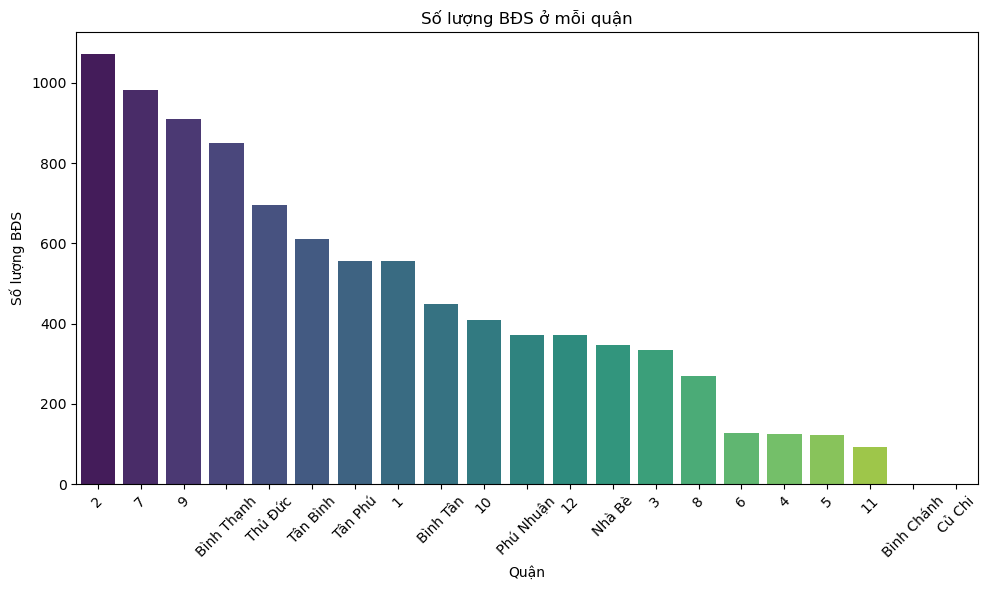

In [62]:
# Đếm số lượng BĐS trong mỗi quận
district_counts = unduplicated_data['Quận'].value_counts().reset_index()
district_counts.columns = ['Quận', 'Số lượng BĐS']

# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=district_counts, x='Quận', y='Số lượng BĐS', palette='viridis')
plt.title('Số lượng BĐS ở mỗi quận')
plt.xlabel('Quận')
plt.ylabel('Số lượng BĐS')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## SỰ PHÂN BỔ VỀ GIÁ TRỊ BDS

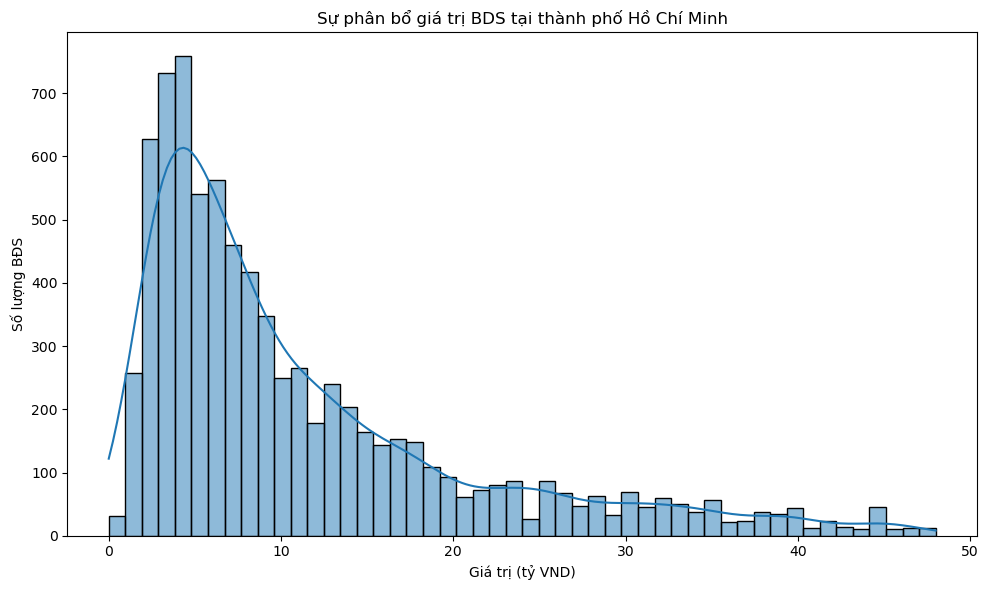

In [81]:


# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_outliers, x="Price", bins=50, kde=True)
plt.title('Sự phân bổ giá trị BDS tại thành phố Hồ Chí Minh')
plt.xlabel('Giá trị (tỷ VND)')
plt.ylabel('Số lượng BĐS')
plt.tight_layout()
plt.show()

## SỰ LIÊN HỆ GIỮA GIÁ TRỊ VÀ DIỆN TÍCH BDS TẠI TPHCM

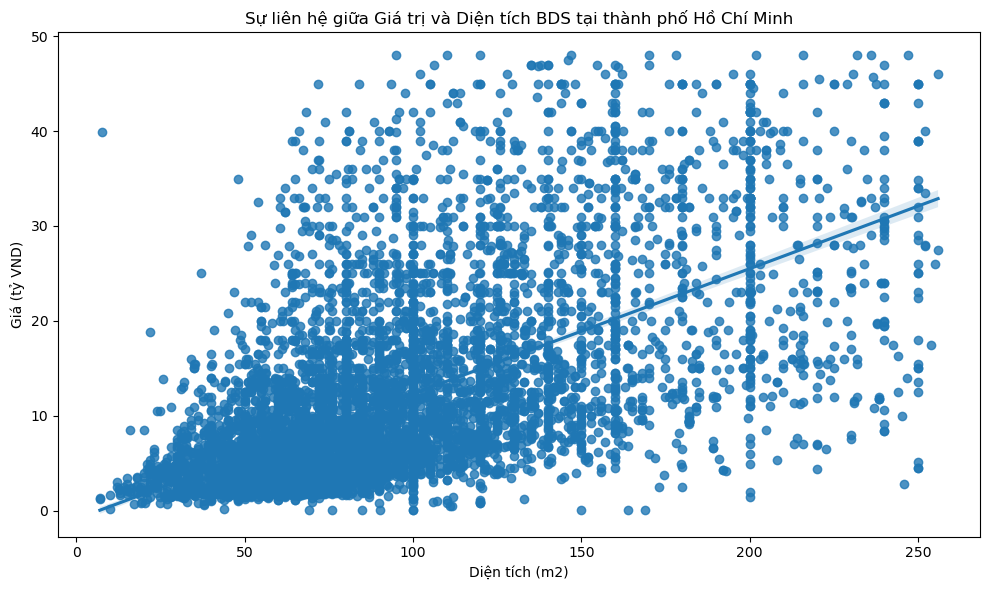

In [82]:

# Vẽ biểu đồ với seaborn
plt.figure(figsize=(10, 6))
sns.regplot(data=df_no_outliers, x=df_no_outliers["Area"], y=df_no_outliers["Price"])
plt.title('Sự liên hệ giữa Giá trị và Diện tích BDS tại thành phố Hồ Chí Minh')
plt.xlabel('Diện tích (m2)')
plt.ylabel('Giá (tỷ VND)')
plt.tight_layout()
plt.show()